## Partie 2: les demandes d'antoine Analyse univariée <br>
## 2 Analyse des indicateurs autour du CA <br>
**Importation des librairie et la dataframe**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import numpy as np
import math

import scipy.stats as stats

df=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet6\data_frame.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   hour        679111 non-null  float64
 5   date1       679111 non-null  object 
 6   price       679111 non-null  float64
 7   categ       679111 non-null  int64  
 8   sex         679111 non-null  object 
 9   birth       679111 non-null  int64  
 10  age         679111 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 57.0+ MB


Correction des types de variable : ( datetime pour date et date1) et ( object pour categ)

In [2]:
df['date']= pd.to_datetime(df['date'])
df['date1']= pd.to_datetime(df['date1'])
df["categ"]=df["categ"].astype(str)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   hour        679111 non-null  float64       
 5   date1       679111 non-null  datetime64[ns]
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  object        
 8   sex         679111 non-null  object        
 9   birth       679111 non-null  int64         
 10  age         679111 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 57.0+ MB


### 2.1 Analyse des différents indicateurs autour du chiffre d'affaires et moyenne mobile<br>
### 2.1.1 Analyse de l'evolutions du CA dans le temps
On commence par créer une série temporaire ts avec le chiffre d'affaire journalier

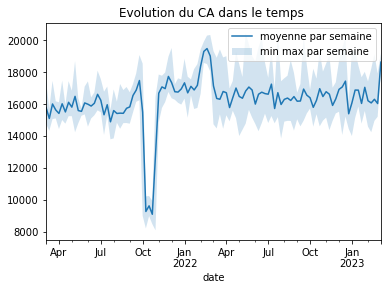

In [4]:
ts=df.groupby("date",as_index=True)["price"].sum()

analyse=ts.resample("w").agg(['mean','min','max'])
analyse['mean'].plot(label='moyenne par semaine')
plt.fill_between(analyse.index,analyse['max'],analyse['min'],alpha=0.2,label='min max par semaine ')
plt.legend()
plt.title("Evolution du CA dans le temps ");

In [5]:
a=ts.resample("M").agg(["mean"])


le CA moyen par semaine , mois et trimestre 

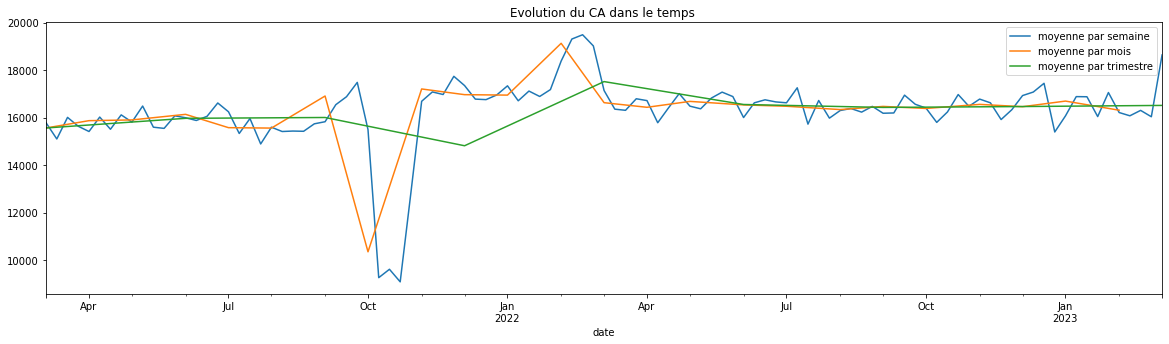

In [6]:
plt.figure(figsize=(20,5))
ts.resample("w").mean().plot(label='moyenne par semaine')
ts.resample("M").mean().plot(label='moyenne par mois')
ts.resample("3M").mean().plot(label='moyenne par trimestre')
plt.legend()
plt.title("Evolution du CA dans le temps ");

**On constate une chute de vente très importante en octobre 2021, donc on analyse l'evolution par catégorie de produits**

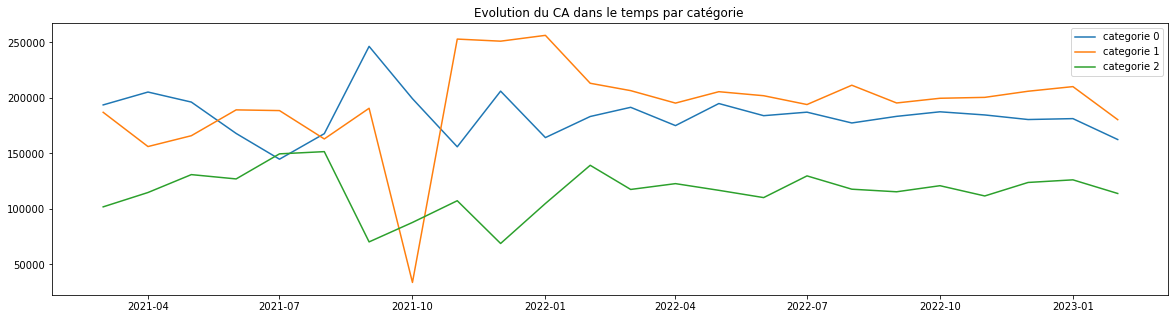

In [7]:
plt.figure(figsize=(20,5))
c0=df[df.categ=="0"].groupby(by="date1",as_index=False)
c1=df[df.categ=="1"].groupby(by="date1",as_index=False)
c2=df[df.categ=="2"].groupby(by="date1",as_index=False)
plt.plot(c0.sum().date1,c0.sum().price, label='categorie 0')
plt.plot(c1.sum().date1,c1.sum().price, label='categorie 1')  
plt.plot(c2.sum().date1,c2.sum().price, label='categorie 2')
plt.legend()
plt.title("Evolution du CA dans le temps par catégorie ");

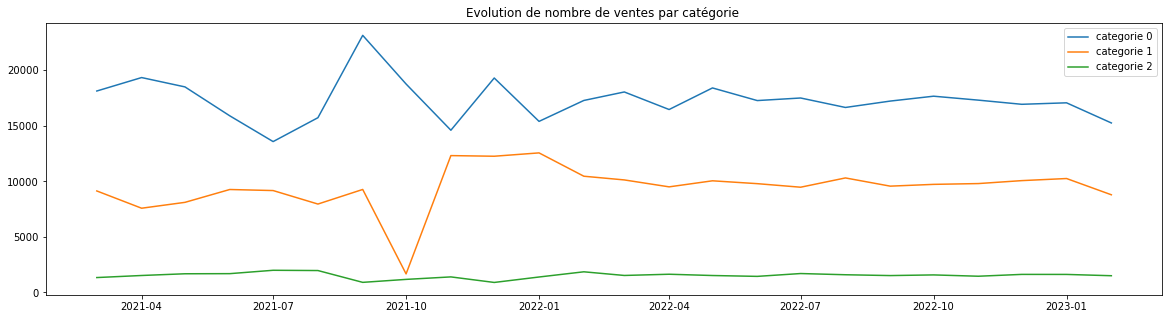

In [8]:
plt.figure(figsize=(20,5))
plt.plot(c0.count().date1,c0.count().price, label='categorie 0')
plt.plot(c1.count().date1,c1.count().price, label='categorie 1') 
plt.plot(c2.count().date1,c2.count().price, label='categorie 2')
plt.title("Evolution de nombre de ventes par catégorie ")
plt.legend();

On note à partir de début 2022 une tendance stable pour les chiffres d'affaire des 3 catégories, avec une plus forte contribution des catégories 1 et 0, et une contribution moindre de la catégorie 2.
**mais on remarque une baisse de vente des produits de la catégorie 1 pendant tout le mois d'octobre 2021**

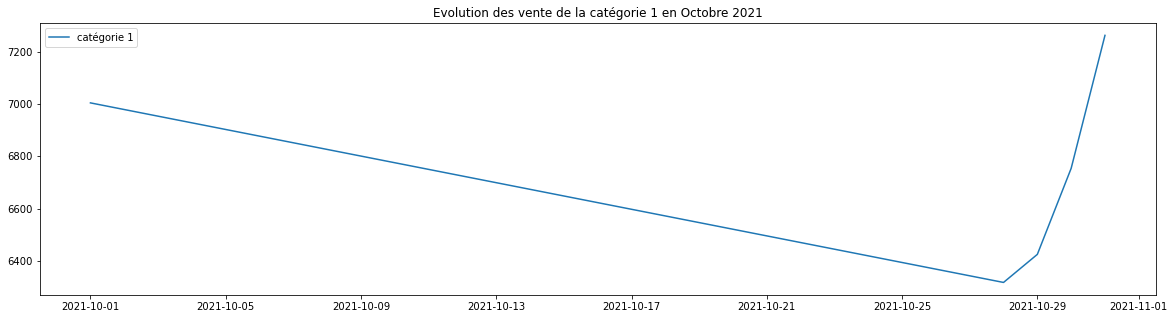

In [9]:
x=df[(df.date1 == "2021-10") & (df.categ=="1")].groupby(by="date",as_index=False).sum()
plt.figure(figsize=(20,5))
plt.plot(x.date,x.price, label='catégorie 1')
plt.title("Evolution des vente de la catégorie 1 en Octobre 2021")
plt.legend()

**On remarque donc qu'il n y avait pas de vente entre le 2 et 27 octobre , à vérifier avec le service vente s'il y avait des mises à jours sur le site web qui ont engendrées l'inaccessibilité aux produits de cette catégorie ou la suppression des données de vente**<br>
le manque de ces informations peut impacté nos analyses de comparaison entre les catégorie donc on a choisis de supprimer les données du mois d'octobre pour toutes les catégories 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   hour        679111 non-null  float64       
 5   date1       679111 non-null  datetime64[ns]
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  object        
 8   sex         679111 non-null  object        
 9   birth       679111 non-null  int64         
 10  age         679111 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 57.0+ MB


In [11]:
octobre=df[(df["date"]>"2021-10-01") & (df["date"]<"2021-10-28")]
octobre

,id_prod,date,session_id,client_id,hour,date1,price,categ,sex,birth,age
52,0_434,2021-10-23,s_108948,c_103,12.0,2021-10-01,16.97,0,f,1986,36
62,0_1453,2021-10-06,s_100965,c_103,18.0,2021-10-01,7.99,0,f,1986,36
73,0_1403,2021-10-19,s_107276,c_103,22.0,2021-10-01,15.99,0,f,1986,36
105,0_1419,2021-10-06,s_100965,c_103,18.0,2021-10-01,8.99,0,f,1986,36
139,0_2086,2021-10-06,s_100965,c_103,18.0,2021-10-01,3.61,0,f,1986,36
...,...,...,...,...,...,...,...,...,...,...,...
678900,2_164,2021-10-05,s_100344,c_3761,11.0,2021-10-01,52.26,2,f,2002,20
678973,0_2075,2021-10-09,s_102200,c_2793,9.0,2021-10-01,8.99,0,m,1933,89
679041,0_1536,2021-10-19,s_107038,c_5005,10.0,2021-10-01,6.59,0,f,1992,30
679044,0_1829,2021-10-19,s_107038,c_5005,10.0,2021-10-01,4.99,0,f,1992,30


In [12]:
print(f"pourcentage des données du mois d'octobre {round((len(octobre.index)/len(df.index))*100,3)} %") 

pourcentage des données du mois d'octobre 2.478 %


In [13]:
df=df.drop(df[(df["date"]>"2021-10-01") & (df["date"]<"2021-10-28")].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662280 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     662280 non-null  object        
 1   date        662280 non-null  datetime64[ns]
 2   session_id  662280 non-null  object        
 3   client_id   662280 non-null  object        
 4   hour        662280 non-null  float64       
 5   date1       662280 non-null  datetime64[ns]
 6   price       662280 non-null  float64       
 7   categ       662280 non-null  object        
 8   sex         662280 non-null  object        
 9   birth       662280 non-null  int64         
 10  age         662280 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 60.6+ MB


### 2.2 moyenne mobile
Pour analyser la tendance de l'evolution du Chiffre d'affaire , nous allons utiliser la méthodes des moyennes mobiles sur une periode d3 mois "un trimestre" 

Text(0.5, 1.0, 'la moyenne mobile du CA sur 3 mois ')

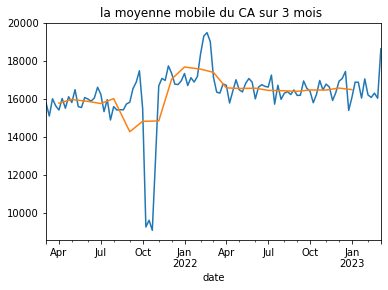

In [14]:
ts.resample("w").mean().plot()
ts.resample("M").mean().rolling(window=3,center=True).mean().plot()
plt.title("la moyenne mobile du CA sur 3 mois ")

**On constate une évolution désaisonnalisée  sauf la chute du mois d'octobre 2022 engendré par le probléme technique sur le siteweb et une légére augmentation de CA en février 2022**<br>
### 2.3 Calcul du chiffre d'affaires total, le panier moyen et le nombre de ventes

In [15]:
## Calcul du chiffre d'affaires total des 12 derniers mois
ca_total=ts.sum()
ca_2023=ts["2023"].sum()
ca_2022=ts["2022"].sum()
ca_2021=ts["2021"].sum()
ca_ly=ts['2022-02-28':'2023-02-28'].sum()
ca_moyen_ly=(ca_ly/12)
print(f"le chiffre d'affaire total générer depuis le début d'activité est {ca_total} €")
print(f"le chiffre d'affaire en 2021 est {round(ca_2021,2)} €")
print(f"le chiffre d'affaire en 2022 est {round(ca_2022,2)} €")
print(f"le chiffre d'affaire en 2023 est {round(ca_2023,2)} €")
print(f"le chiffre d'affaire des 12 dernier mois est {round(ca_ly,2)} €")
print(f"le chiffre d'affaire moyen des 12 dernier mois est {round(ca_moyen_ly,2)} €")

le chiffre d'affaire total générer depuis le début d'activité est 11853728.68 €
le chiffre d'affaire en 2021 est 4770826.56 €
le chiffre d'affaire en 2022 est 6108681.81 €
le chiffre d'affaire en 2023 est 974220.31 €
le chiffre d'affaire des 12 dernier mois est 6040849.9 €
le chiffre d'affaire moyen des 12 dernier mois est 503404.16 €


**Calcul du nombre de ventes**

In [16]:
## Calcul du nombre total de ventes
nombre_vente = df['session_id'].count()
print("Le nombre de transactions réalisées est de:", nombre_vente)

Le nombre de transactions réalisées est de: 662280


**calcul des valeurs du panier moyen**

In [17]:
panier=df.groupby("session_id")["price"].mean()
panier_moyen=panier.mean();
panier_max=panier.max()
panier_min=panier.min()
print(f"Le panier moyen de nos clients est de {round(panier_moyen,2)} €")
print(f"Le panier maximal est de {round(panier_max,2)} € et le panier minimal est de {round(panier_min,2)} €")

Le panier moyen de nos clients est de 19.24 €
Le panier maximal est de 300.0 € et le panier minimal est de 0.62 €


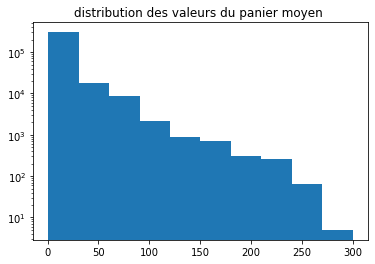

In [18]:
plt.hist(panier,log=True)
plt.title("distribution des valeurs du panier moyen ");

In [19]:
panier.skew()

4.867578475394591

les valeurs des paniers suit **une distribution non symetrique étalée à droite** ce qui signifie que la majorité des paniers ont une valeur inférieur à la valeur moyenne des paniers

**Le chiffre d’affaires total de la librairie est un peu plus de 11.8 millions euros sur une période de 2 ans (2021-03-01 à 2023-02-28), avec environ 679 milles livres vendus.
Le panier moyen est de 19.15 € avec un panier maximal est de 300.0 € et un panier minimal est de 0.62 € 
La moyenne du CA mensuel des 12 derniers mois est aux alentours de 503 milles euros par mois**

### 2.4.1 le nombre des ventes et le CA par catégorie de produit

Text(0.5, 0.98, 'proportions de nombre de vente et CA par catégorie de produit')

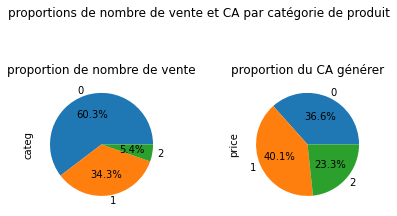

In [20]:
plt.subplot(1,2,1)
df["categ"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion de nombre de vente")
plt.subplot(1,2,2)
df.groupby(by="categ").sum()["price"].plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion du CA générer")
plt.subplots_adjust(wspace=0.6)
plt.suptitle("proportions de nombre de vente et CA par catégorie de produit")

**les livres de la catégorie 0 sont les plus vendu ( 61%) c est logique vu que c est des produits pas cher dont la moyenne des prix ne dépasse pas 10 euros , généralement c est des livre de colorriage, des bd  ou des livres de poches 
suivi par la catégorie 1 dont la moyenne des prix est de 20 euro peuvent etre des romans, des chroniques ou des biographies puis la catégorie 2 avec des livres plus cher qui peuvent etre des livres techniques , des encyclopédie ou des collections<br> malgré que le nombre de vente de la catégorie 0 est plus important que la catégorie 1 mais c est cette derniere qui nous rapporte le plus de chiffre d'affaire**

### 2.4.2 le nombre des ventes et le CA par genre

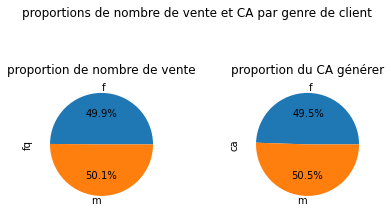

In [21]:
sexe=df.groupby("sex").agg(fq=("session_id","count" ),ca=("price","sum"),nbr=("sex","count"))
plt.subplot(1,2,1)
sexe["fq"].plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion de nombre de vente")
plt.subplot(1,2,2)
sexe["ca"].plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion du CA générer")
plt.subplots_adjust(wspace=0.6)
plt.suptitle("proportions de nombre de vente et CA par genre de client ");

### 2.4.3 les 5 top/flop produits

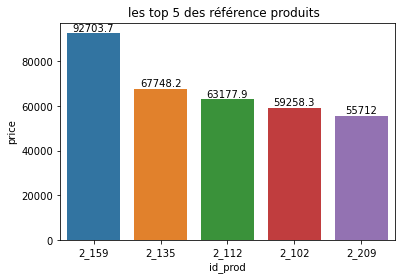

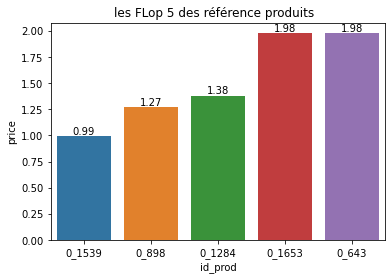

In [22]:
tops=df.groupby('id_prod',as_index=False).sum().sort_values(by='price',ascending=False).head(5)
ax=sns.barplot(x="id_prod",y="price",data=tops)
ax.bar_label(ax.containers[0])
plt.title("les top 5 des référence produits  ")
plt.show()
flops=df.groupby('id_prod',as_index=False).sum().sort_values(by='price',ascending=True).head(5)
ax=sns.barplot(x="id_prod",y="price",data=flops)
ax.bar_label(ax.containers[0])
plt.title("les FLop 5 des référence produits  ")
plt.show()

### 2.4.4 Les TOP/FLOP produits par catégorie

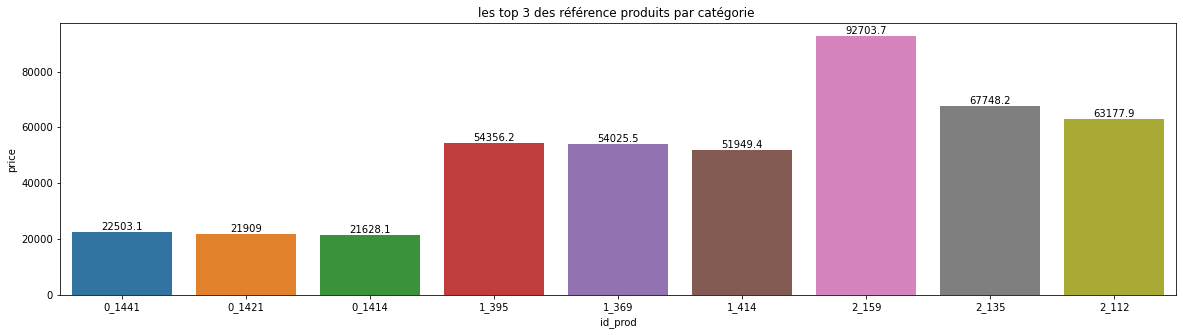

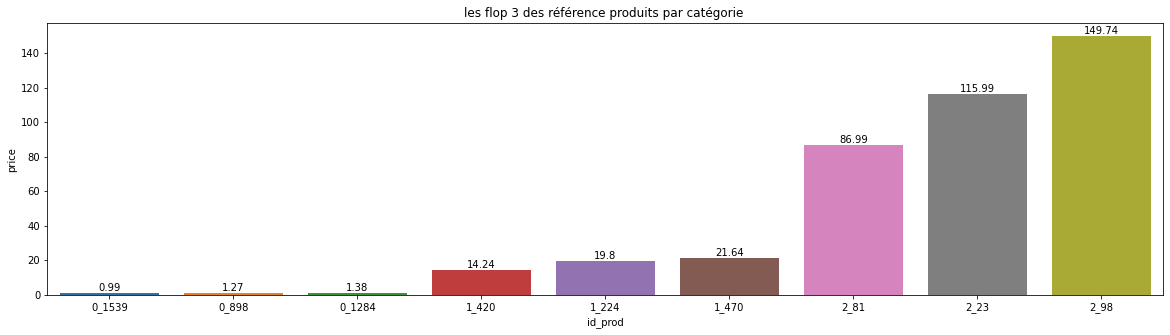

In [23]:
a=df[df.categ=="0"].groupby('id_prod',as_index=False).sum().sort_values(by='price',ascending=False).head(3)
b=df[df.categ=="1"].groupby('id_prod',as_index=False).sum().sort_values(by='price',ascending=False).head(3)
c=df[df.categ=="2"].groupby('id_prod',as_index=False).sum().sort_values(by='price',ascending=False).head(3)
frame=[a,b,c]
tops=pd.concat(frame)
plt.figure(figsize=(20,5))
ax=sns.barplot(x="id_prod",y="price",data=tops)
ax.bar_label(ax.containers[0])
plt.title("les top 3 des référence produits par catégorie ")
plt.show()
a=df[df.categ=="0"].groupby('id_prod',as_index=False).sum().sort_values(by='price').head(3)
b=df[df.categ=="1"].groupby('id_prod',as_index=False).sum().sort_values(by='price').head(3)
c=df[df.categ=="2"].groupby('id_prod',as_index=False).sum().sort_values(by='price').head(3)
frame=[a,b,c]
flops=pd.concat(frame)
plt.figure(figsize=(20,5))
plt.title("les flop 3 des référence produits par catégorie ")
ax=sns.barplot(x="id_prod",y="price",data=flops)
ax.bar_label(ax.containers[0])
plt.show()

### 2.5 Les profils de nos clients 
### 2.5.1 Les profils des clients par rapport au montant totale d’achats

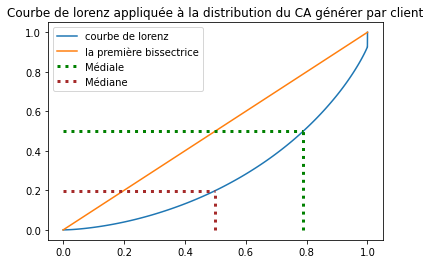

In [24]:
achat=df.groupby("client_id",as_index=False).sum()
m_achat=achat["price"]
n=len(m_achat)
lorenz=np.cumsum(np.sort(m_achat))/m_achat.sum()
lorenz=np.append([0],lorenz)
xaxis=np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post',label="courbe de lorenz")
plt.plot(xaxis,xaxis, label="la première bissectrice")
# medial
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 
plt.plot([0, medial], [0.5, 0.5], color='green', linestyle=':', linewidth=3, label="Médiale")
plt.plot([medial, medial], [0, 0.5], color='green', linestyle=':', linewidth=3)
# Médiane
mediane = lorenz[int(round(len(lorenz)) / 2)]
plt.plot([0.5, 0.5], [0, mediane], color='brown', linestyle=':', linewidth=3, label="Médiane")
plt.plot([0, 0.5], [mediane, mediane], color='brown', linestyle=':', linewidth=3)
plt.legend()
plt.title("Courbe de lorenz appliquée à la distribution du CA générer par client");

In [25]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(f"l'indice de gini = {round(gini,2)}, donc la distribution du CA par client est moyennement égalitaire ")

l'indice de gini = 0.45, donc la distribution du CA par client est moyennement égalitaire 


In [26]:
achat.sort_values(by="price",ascending=False)[["client_id","price"]].head(6)

,client_id,price
677,c_1609,314915.65
4388,c_4958,284285.38
6337,c_6714,150857.58
2724,c_3454,112470.61
2108,c_2899,5214.05
634,c_1570,5183.05


on remarque q'on a 4 clients qui achétent de grandes quantités , on a donc deux catégories de clients ( profesionnels et particuliers)

Text(0.5, 1.0, 'la proportion des clients particuliers et professionnel  ')

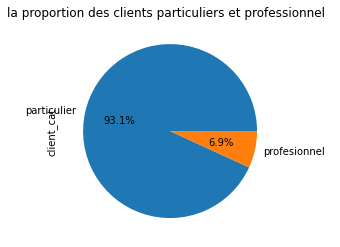

In [27]:
pro=achat.sort_values(by="price",ascending=False).head(4)["client_id"]
df['client_cat']=["profesionnel"  if i in (pro.values) else "particulier"  for i in df.client_id]
df['client_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("la proportion des clients particuliers et professionnel  ")

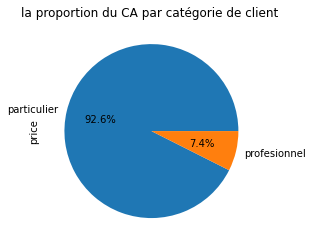

In [28]:
df.groupby(by='client_cat').sum()["price"].plot(kind='pie',autopct='%1.1f%%')
plt.title("la proportion du CA par catégorie de client ")
pro=df[df['client_cat']=="profesionnel"]

avec 4 client professionel (6.9%de nos clients) on fait 7.4 % du CA . <br> 
### 2.5.2 Analyse des profils des clients professionnels

Text(0.5, 1.0, 'proportion des profesionnel par genre')

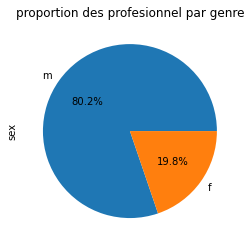

In [29]:
pro["sex"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion des profesionnel par genre")

In [30]:
pro["age"].unique()

array([42, 54, 53, 23], dtype=int64)

Text(0.5, 1.0, 'proportion des categories acheter par les profesionnel')

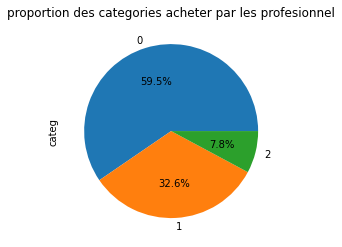

In [31]:
pro["categ"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion des categories acheter par les profesionnel")

**la majorité des clients profesionnel c est des homme entre 42ans et 53 ans qui achetent 60% des produits de la catégorie 0 et 31% de la catégorie 1**

### 2.5.3 Analyse des profils des clients particuliers

In [32]:
df=df[df['client_cat']=="particulier"]

**Distributions du CA générer par les client particulier**

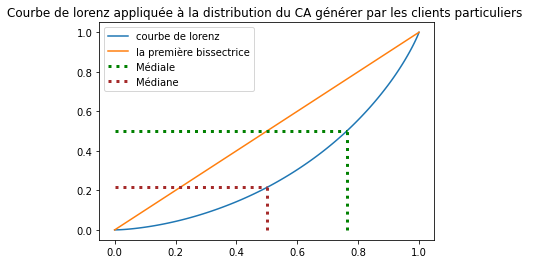

In [33]:
achat=df.groupby("client_id",as_index=False).sum()
m_achat=achat["price"]
n=len(m_achat)
lorenz=np.cumsum(np.sort(m_achat))/m_achat.sum()
lorenz=np.append([0],lorenz)
xaxis=np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post',label="courbe de lorenz")
plt.plot(xaxis,xaxis, label="la première bissectrice")
# medial
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 
plt.plot([0, medial], [0.5, 0.5], color='green', linestyle=':', linewidth=3, label="Médiale")
plt.plot([medial, medial], [0, 0.5], color='green', linestyle=':', linewidth=3)
# Médiane
mediane = lorenz[int(round(len(lorenz)) / 2)]
plt.plot([0.5, 0.5], [0, mediane], color='brown', linestyle=':', linewidth=3, label="Médiane")
plt.plot([0, 0.5], [mediane, mediane], color='brown', linestyle=':', linewidth=3)
plt.legend()
plt.title("Courbe de lorenz appliquée à la distribution du CA générer par les clients particuliers ");

In [34]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(f"l'indice de gini = {round(gini,2)}, donc la distribution du CA par client est moyennement égalitaire ")

l'indice de gini = 0.4, donc la distribution du CA par client est moyennement égalitaire 


### 2.5.3.1 par rapport au genre

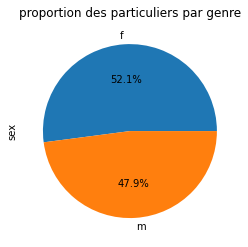

In [35]:
df["sex"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("proportion des particuliers par genre");

In [114]:
df["sex"].value_counts()

f    321177
m    295683
Name: sex, dtype: int64

on trouve qu’on a plus de femme que d’homme comme clients.
La répartition du CA et du nombre de ventes est légèrement supérieur pour les femmes que pour les hommes, ce qui peut s’expliquer par un nombre de clientes supérieure à celui des clients

### 2.5.3.2 par rapport à l'age

In [37]:
age=df["age"]
print(f"le client le plus agé a {age.max()} ans, le plus jeune a {age.min()} ans , avec une moyenne de de {int(age.mean())} ans " )
print(f"50% de nos clients ont moins de {age.median()} ans")
print(f"avec une dispersion autour de la moyenne de {int(age.std())}  ans")

le client le plus agé a 93 ans, le plus jeune a 18 ans , avec une moyenne de de 44 ans 
50% de nos clients ont moins de 43.0 ans
avec une dispersion autour de la moyenne de 13  ans


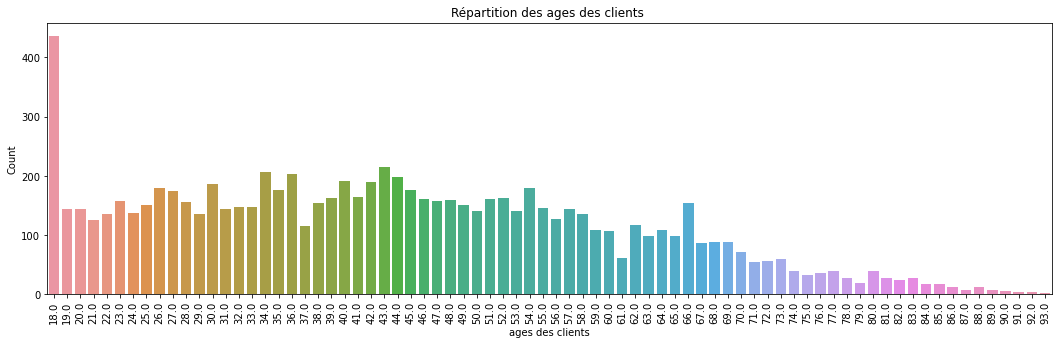

In [38]:
fig = plt.figure(figsize =(18,5))
sns.countplot(x=df.groupby("client_id").mean()["age"])
plt.xlabel("ages des clients")
plt.ylabel("Count")
plt.title("Répartition des ages des clients ")
plt.xticks(fontsize = 10, rotation=90)
plt.yticks(fontsize = 10);

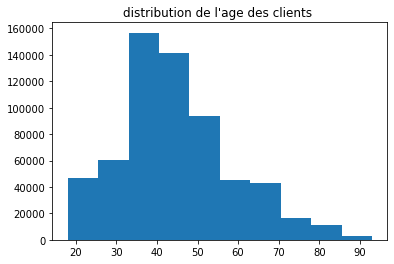

In [39]:
plt.hist(df["age"])
plt.title("distribution de l'age des clients ");

In [40]:
age.skew()

0.585171738874846

la variable age suit une **distribution non symetrique étalée à droite** <br>  on crée une variable "age_cat" pour les categorie d'age 

In [41]:
df["age_cat"]=pd.cut(df["age"],bins=4)

In [42]:
df["age_cat"].unique()

[(17.925, 36.75], (36.75, 55.5], (55.5, 74.25], (74.25, 93.0]]
Categories (4, interval[float64, right]): [(17.925, 36.75] < (36.75, 55.5] < (55.5, 74.25] < (74.25, 93.0]]

Text(0.5, 1.0, "Chiffre d'affaire par categorie d'age")

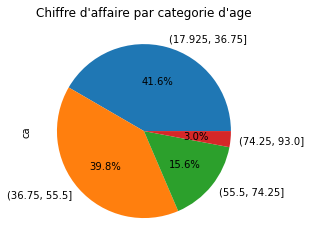

In [43]:
df.groupby("age_cat").agg(ca=("price","sum"))["ca"].plot(kind='pie',autopct='%1.1f%%')
plt.title("Chiffre d'affaire par categorie d'age")

Text(0.5, 1.0, "fréquence d'achat par categorie d'age")

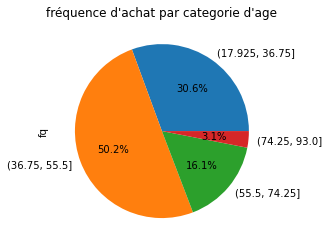

In [44]:
df.groupby("age_cat").agg(fq=("session_id","count"))["fq"].plot(kind='pie',autopct='%1.1f%%')
plt.title("fréquence d'achat par categorie d'age")

**les clients entre 36 et 55 ans rapporte plus de 39% du chiffre d'affaire pour à peu prés 50% d'achat <br> Alors que les plus jeunes ( de 18 ans à33ans) reporte 41% de CA pour 30% d'achat ** 

### 2.6 En quel moment de la journée on réalise le plus de vente

In [45]:
df.groupby("hour").head()

,id_prod,date,session_id,client_id,hour,date1,price,categ,sex,birth,age,client_cat,age_cat
0,0_1518,2022-05-20,s_211425,c_103,13.0,2022-05-01,4.18,0,f,1986,36,particulier,"(17.925, 36.75]"
1,0_1518,2021-07-20,s_64849,c_103,13.0,2021-07-01,4.18,0,f,1986,36,particulier,"(17.925, 36.75]"
2,0_1518,2022-08-20,s_255965,c_103,13.0,2022-08-01,4.18,0,f,1986,36,particulier,"(17.925, 36.75]"
3,0_1418,2022-06-18,s_225411,c_103,1.0,2022-06-01,8.57,0,f,1986,36,particulier,"(17.925, 36.75]"
4,0_1418,2021-08-18,s_77214,c_103,1.0,2021-08-01,8.57,0,f,1986,36,particulier,"(17.925, 36.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0_1033,2021-05-30,s_41432,c_6197,0.0,2021-05-01,7.99,0,m,1985,37,particulier,"(36.75, 55.5]"
294,0_1033,2022-12-30,s_319270,c_6197,0.0,2022-12-01,7.99,0,m,1985,37,particulier,"(36.75, 55.5]"
295,0_1033,2023-01-30,s_334291,c_6197,0.0,2023-01-01,7.99,0,m,1985,37,particulier,"(36.75, 55.5]"
335,1_336,2021-04-29,s_27205,c_682,0.0,2021-04-01,23.56,1,f,1974,48,particulier,"(36.75, 55.5]"


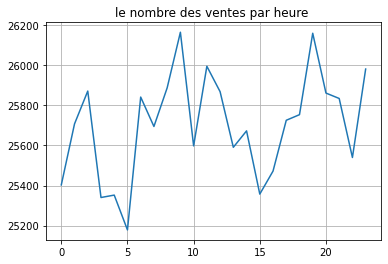

In [46]:
keys=[]
hours=[]
for i,j in df.groupby("hour"):
    keys.append(i)
    hours.append(len(j))
plt.grid()
plt.plot(keys,hours)
plt.title("le nombre des ventes par heure ");

**les heures ou on vends le plus sont : entre 9h et 11h et vers 19h jusqu’à 20h**

# Partie3: Demande de Julie "analyse_bivariée"<br>
Julie souhaite avoir des conclusions précises sur la présence de lien et correlations entre les différentes caractéristiques de nos clients afin d'etudier leur comportement d'achat.<br>
pour mieux etudier le comportement générale de la mjorité de nos clients ,on se concentre sur les clients particuliers qui representent 93.6 % de notre clientélles . 


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616860 entries, 0 to 679110
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     616860 non-null  object        
 1   date        616860 non-null  datetime64[ns]
 2   session_id  616860 non-null  object        
 3   client_id   616860 non-null  object        
 4   hour        616860 non-null  float64       
 5   date1       616860 non-null  datetime64[ns]
 6   price       616860 non-null  float64       
 7   categ       616860 non-null  object        
 8   sex         616860 non-null  object        
 9   birth       616860 non-null  int64         
 10  age         616860 non-null  int64         
 11  client_cat  616860 non-null  object        
 12  age_cat     616860 non-null  category      
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 61.8+ MB


## 3.1 le lien entre le genre d’un client et les catégories des livres achetés<br> 
### 3.1.1 Choix du test 
On cherche à determiner le lien entre (le genre du client qui est une variable qualitative **Vs** la catégorie des livres qui est une variable qualitative) qui se traduit par une dépendance ou indépendance  <br> On choisis **le test CHI-2** qui nous permet de verifier la l'indépendance de ces deux variables <br> 

### 3.1.2 L'hypothése de signification du test CH-2 
**h0= pas de lien entre le sexe et la catégorie de produits acheté**<br>
**h1= il y'a un lien entre le sexe et la catégorie de produits acheté**<br>
### 3.1.3 Création de la table de contingence( genre Vs catégorie)

In [48]:
contingency_table=pd.crosstab(df["sex"],df['categ'],margins=True,margins_name="sommes")
print(contingency_table)

categ        0       1      2  sommes
sex                                  
f       193309  111331  16537  321177
m       179244  101017  15422  295683
sommes  372553  212348  31959  616860


Vusialisation de la table de contingence

Text(0.5, 1.0, 'categ vs Gender')

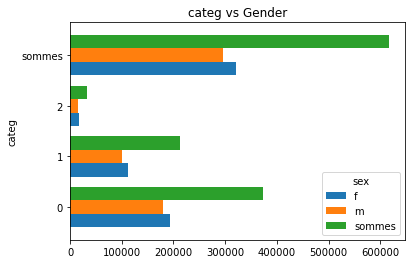

In [49]:
contingency_table.T.plot(kind='barh', ylabel='frequence', width=0.8)
plt.title('categ vs Gender')

### 3.1.4 execution du test chi-2

In [50]:
# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_table) 
# Print the p-value
print(f"le P_value={p}")
alpha=0.05
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre le sexe et la catégorie des produits acheté")
else:
    print("conserver H0,pas de lien entre le sexe et la catégorie des produits acheté")


le P_value=0.008384344712277126
Rejeter H0,il y'a un lien entre le sexe et la catégorie des produits acheté


In [51]:
Observed_Values = contingency_table.values 
print("Valeurs observées :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Valeurs attendu :-\n",Expected_Values)
print("Degree de liberté: ",dof)

Valeurs observées :-
 [[193309 111331  16537 321177]
 [179244 101017  15422 295683]
 [372553 212348  31959 616860]]
Valeurs attendu :-
 [[193975.05897773 110562.02962747  16639.91139481 321177.        ]
 [178577.94102227 101785.97037253  15319.08860519 295683.        ]
 [372553.         212348.          31959.         616860.        ]]
Degree de liberté:  6


### 3.1.5 Conclusion <br>


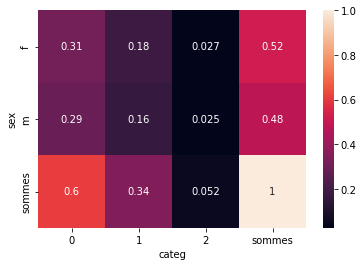

In [52]:
contingency_table_normalized=pd.crosstab(df["sex"],df['categ'],margins=True,margins_name="sommes",normalize="all")
ax=sns.heatmap(data=contingency_table_normalized,annot=True)

Selon le test chi_2 on peut conclure que les deux variable genre du client et la catégorie des livres achetés sont dépendant<br> Avec la heatmap on peux voir que <br>
les femmes achetents 14% de plus dans la catégorie 0 que la catégorie 1, cette différence et de 13% chez les hommes <br>
elles achetents 15.3% de plus dans la catégorie 1 que la catégorie 2, la différence pour les hommes est de 13.5%


## 3.2  le lien entre l’âge des clients et le montant total des achats<br>
l'age est une variable quantitative Vs le montant total des achat qussi une variable quantitative<br>
Pour les variables quantitative on doit commencer par un test de normalité pour choisire entre un test statistique paramétrique ou non paramtrique 
### 3.2.1 Les tests de normalité 
**le test de normalité du montant total des achats**

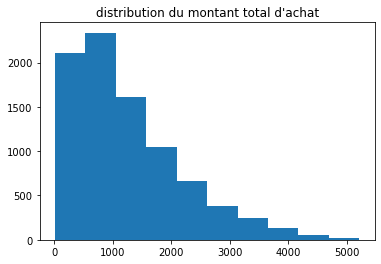

In [53]:
montant_total=df.groupby("client_id").sum()["price"]
plt.hist(montant_total)
plt.title("distribution du montant total d'achat");

In [54]:
#test de normalité significatif d'anderson 
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal  
s,p,g=stats.anderson(montant_total, dist='norm')
print(" pour alpha= 0.05 ")
if p[2]<0.05:
    print("HO conserver , les donner suivent une distribution normal ")
else:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")

 pour alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


In [55]:
#test de normalité non significatif de jarque_bera
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal 
s,p=stats.jarque_bera(df['age'])
print(" pour une alpha= 0.05 ")
if p<0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


**test de normalité des ages**

<AxesSubplot:>

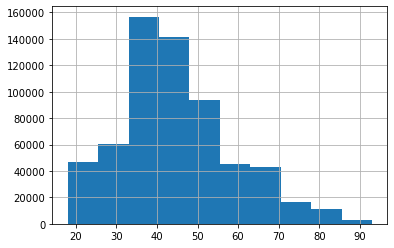

In [56]:
df["age"].hist()

**test de normalité d'anderson**

In [57]:
#H0:les données d'age suivent une distribution normal  
#H1:les données d'age ne suivent pas une distribution normal  
s,p,g=stats.anderson(df['age'], dist='norm')
print(" pour une alpha= 0.05 ")
if p[2]>0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")


 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


In [58]:
#test de normalité jarque_bera
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal 
s,p=stats.jarque_bera(df['age'])
print(" pour une alpha= 0.05 ")
if p<0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


### 3.2.2 Choix du test statistique 
les deux valeurs ne suivent pas une distribution normal donc nous allons utiliser un test de correlation non paramétrique **spearmanr**

In [59]:
df_age=df.groupby("age",as_index=False).sum()
df_age

,age,hour,price,birth
0,18,167017.0,595100.06,29787456
1,19,49948.0,174037.33,8548804
2,20,53052.0,179767.64,8982974
3,21,48793.0,175223.94,8358177
4,22,49959.0,161838.58,8656000
...,...,...,...,...
71,89,3540.0,5212.55,620493
72,90,3420.0,4885.59,575736
73,91,2264.0,2760.83,320546
74,92,3028.0,3993.88,434250


### 3.2.3 L’hypothése de signification du test spearmanr

h0= pas de lien entre l'age et le montant total d'achat<br>
h1= il y'a un lien entre l'age et le montant total d'achat

### 3.2.4 Execution du test spearmanr

In [60]:
c,p=stats.spearmanr(df_age[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)

le coef de correlation est  -0.8740396445659603
le p value est  6.668764227215193e-25


In [61]:
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et le montant total d'achat")
else:
    print("conserver H0,pas de lien entre l'age et le montant total d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

Rejeter H0,il y'a un lien entre l'age et le montant total d'achat
une correlation négative de  -0.874


**Visualisation de la correlation age Vs montant total d'achat**

(15.0, 94.0)

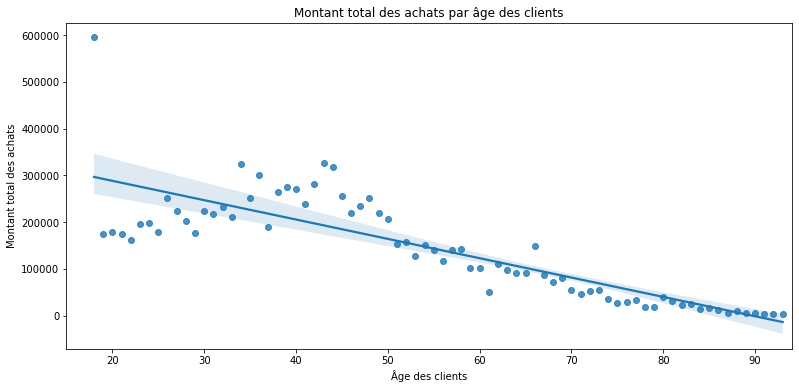

In [62]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='price', data =df_age)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients")
plt.xlim(15,94)

### 3.2.5 Conclusion <br>
Selon le test de corrélation de spermanr on peut conclure qu'il y a une forte corrélation négative de -0.8 entre l'age du client et le montant totale dépensé<br>Grace au graphe nous remarquons que la corrélation est différente entre les clients de moins de 50 et les clients dont l'age est de 50 ans ou plus :<br>


 ### 3.2.6 Le coeficient de corrélation entre l'age et le montant total d'achat pour les clients de moins de 50 ans avec le test de spearmanr

In [63]:
age_less=df_age.loc[df_age['age']<50]

In [64]:
age_less.head()

,age,hour,price,birth
0,18,167017.0,595100.06,29787456
1,19,49948.0,174037.33,8548804
2,20,53052.0,179767.64,8982974
3,21,48793.0,175223.94,8358177
4,22,49959.0,161838.58,8656000


### 3.2.6.1 Les hypothéses du test spearmanr

h0= pas de lien entre l'age et le montant total d'achat<br>
h1= il y'a un lien entre l'age et le montant total d'achat

### 3.2.6.2 Execution du test 'spearmanr'

In [65]:
c,p=stats.spearmanr(age_less[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et le montant total d'achat")
else:
    print("conserver H0,pas de lien entre l'age et le montant total d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  0.5069648093841641
le p value est  0.003064429834853877
Rejeter H0,il y'a un lien entre l'age et le montant total d'achat
une correlation positive de  0.507


**visualisation de la correlation pour les moins de 50 ans**

Text(0.5, 1.0, 'Montant total des achats par âge des clients moins de 50ans ')

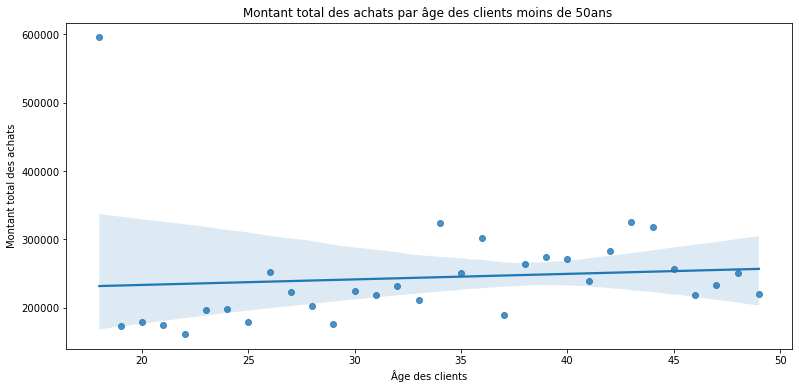

In [66]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='price', data =age_less)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients moins de 50ans ")


### 3.2.6.3 Conclusion<br>
la corréltion est positive d'ordre 0.51 pour les clients de moins de 50 ans .
donc pour les clients agées de moins de 50ans , le montant total des dépences augmente avec l'age 

### 3.2.7 le coeficient de corrélation entre l’age et le montant total d’achat pour les clients de 50 ans ou plus avec le test de spearmanr

In [67]:
age_more=df_age.loc[df_age['age']>=50]

### 3.2.7.1 les hypothése du test "spermanr"

h0= pas de lien entre l'age et le montant total d'achat<br>
h1= il y'a un lien entre l'age et le montant total d'achat

### 3.2.7.2 Execution du test "spermanr"

In [68]:
c,p=stats.spearmanr(age_more[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et le montant total d'achat")
else:
    print("conserver H0,pas de lien entre l'age et le montant total d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.9656095842142355
le p value est  3.3950379383259963e-26
Rejeter H0,il y'a un lien entre l'age et le montant total d'achat
une correlation négative de  -0.966


**visualisation de la correlation pour les moins de 50 ans**

Text(0.5, 1.0, 'Montant total des achats par âge des clients moins de 50ans ')

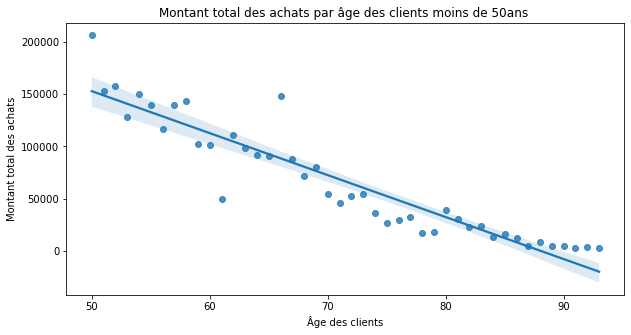

In [69]:
plt.figure(figsize=(10, 5))
sns.regplot(x='age', y='price', data =age_more)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients moins de 50ans ")

### 3.2.7.3 Conclusion <br>
pour les clients de 50ans ou plus on remarque une forte corrélation négative de -0.9 entre leur age et le montant totale des achats .
Donc pour les clients de plus de 50 ans , le plus ils sont agée le moins ils dépensent

## 3.3 lien entre l’âge des clients et la taille du panier moyen<br>
On 'a montrer que l'age ne suis pas une distribution normale,donc il reste à etudier la normalité de la distribution des paniers moyen 

Text(0.5, 1.0, 'distribution du panier moyen')

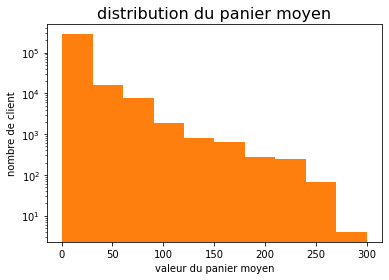

In [70]:
panier=df.groupby(['age',"session_id"],as_index=False).mean()
plt.hist(panier.price,log=True)
plt.hist(panier.price,log=True)
plt.ylabel('nombre de client')
plt.xlabel('valeur du panier moyen')
plt.title("distribution du panier moyen",fontsize= 16)

In [71]:
panier['price']

0         13.150000
1         13.110000
2         10.406667
3         69.990000
4         60.490000
            ...    
310668    13.110000
310669    21.122500
310670     7.990000
310671    10.595000
310672    15.780000
Name: price, Length: 310673, dtype: float64

### 3.3.1 test de normalité sur la valeur du panier moyen
**test de signification d'anderson**

In [72]:
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal  
s,p,g=stats.anderson(panier["price"], dist='norm')
print(" pour une alpha= 0.05 ")
if p[2]>0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


**test de normalité de jerque_bera sur la valeur du panier moyen**

In [73]:
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal 
s,p=stats.jarque_bera(panier["price"])
print(" pour une alpha= 0.05 ")
if p<0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


### 3.3.2 Choix du test statistique
les deux valeurs ne suivent pas une distribution normal donc nous allons utiliser un test de correlation non paramétrique spearmanr

In [74]:
panier=panier[["age","price"]].groupby("age",as_index=False).mean()
panier

,age,price
0,18,47.239192
1,19,46.918093
2,20,47.206135
3,21,49.523407
4,22,44.824070
...,...,...
71,89,15.952336
72,90,15.977652
73,91,16.657697
74,92,17.448625


### 3.3.3 les hypothése du test spearmanr

h0= pas de lien entre l'age et le panier moyen <br>
h1= il y'a un lien entre l'age et le panier moyen

### 3.3.4 Execution du test spearmanr

In [75]:
c,p=stats.spearmanr(panier[["age","price"]])
p

0.5944661253559925

In [76]:
if p <=alpha:
    print("Rejeter H0,il y'a un lien entre l'age' et la taille du panier moyen")
else:
    print("conserver H0,pas de lien entre l'age et la taille du panier moyen")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

conserver H0,pas de lien entre l'age et la taille du panier moyen
une correlation négative de  -0.062


**visualisation de la correlation entre l'age et la valeur du panier moyen** 

Text(0.5, 1.0, "correlation entre l'age et le panier moyen ")

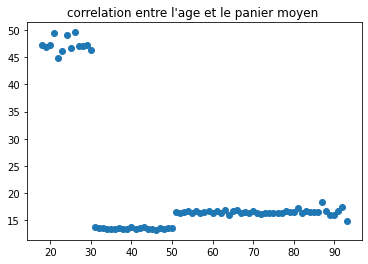

In [77]:
plt.scatter(panier["age"],panier['price'])
plt.title("correlation entre l'age et le panier moyen ")

### 3.3.5 Conclusion 
Selon le test statistique spearmanr on peut conclure qu'il n'y a pas de relation entre l'age du client et la valeur de son panie moyen , nous allons approfendire notre etude de correlation sur chaque tranche d'age en se basant sur les resultats du graphes(moins de 30ans , entre 30 et 50 ans , 50 ans et plus )

### 3.3.6.1 Le coeficient de corrélation entre l’age et la valeur du panier moyen pour les clients de mois de 30 ans avec le test de spearmanr

In [78]:
less_30=panier[panier["age"]<=30]

In [79]:
#h0= pas de lien entre l'age et la valeur du panier moyen 
#h1= il y'a un lien entre l'age et la valeur du panier moyen
c,p=stats.spearmanr(less_30[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la valeur du panier moyen")
else:
    print("conserver H0,pas de lien entre l'age et la valeur du panier moyen")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.14835164835164835
le p value est  0.6286094178894162
conserver H0,pas de lien entre l'age et la valeur du panier moyen
une correlation négative de  -0.148


**Visalisation de la correlation entre l'age du client et la veleur moyen de son panier**

Text(0.5, 1.0, 'valeur du panier moyen pour les clients de moins de 30 ans  ')

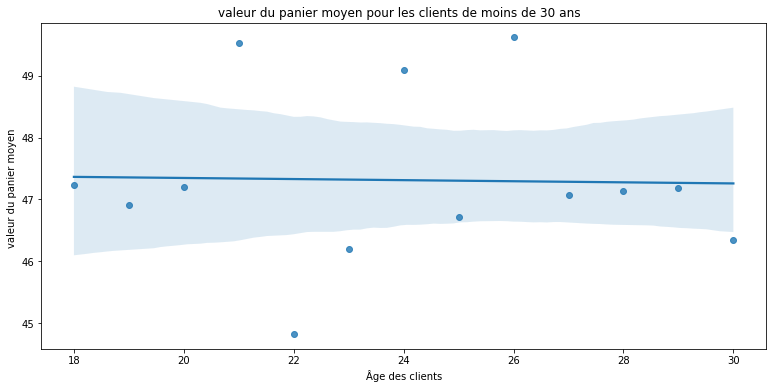

In [80]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='price', data =less_30)
plt.ylabel('valeur du panier moyen ')
plt.xlabel('Âge des clients')
plt.title("valeur du panier moyen pour les clients de moins de 30 ans  ")

### 3.3.6.2 Conclusion 
les résultats du test spearmanr confirme l'hypotése qu'il n y pas de lien entre l'age du client et la valeur de son panier moyen avec un coeficient de -0.15

### 3.3.7.1 Le coeficient de corrélation entre l’age et la valeur du panier moyen pour les clients de 30 à 50 ans  avec le test de spearmanr

In [81]:
more_30=panier[(panier["age"]>30) &(panier["age"]<50)]

In [82]:
#h0= pas de lien entre l'age et la valeur du panier moyen 
#h1= il y'a un lien entre l'age et la valeur du panier moyen
c,p=stats.spearmanr(more_30[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la valeur du panier moyen")
else:
    print("conserver H0,pas de lien entre l'age et la valeur du panier moyen")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.10350877192982455
le p value est  0.6732515278554065
conserver H0,pas de lien entre l'age et la valeur du panier moyen
une correlation négative de  -0.104


**Visalisation de la correlation entre l'age du client et la veleur moyen de son panier**

Text(0.5, 1.0, 'valeur du panier moyen pour les clients de 30 à 50 ans  ')

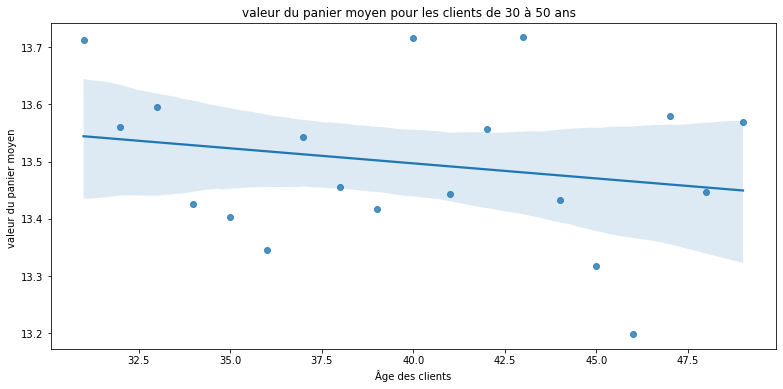

In [83]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='price', data =more_30)
plt.ylabel('valeur du panier moyen ')
plt.xlabel('Âge des clients')
plt.title("valeur du panier moyen pour les clients de 30 à 50 ans  ")

### 3.3.7.2 Conclusion 
les résultats du test spearmanr confirme l'hypotése qu'il n y pas de lien entre l'age du client et la valeur de son panier moyen avec un coeficient de -0.13

### 3.3.8.1 Le coeficient de corrélation entre l’age et la valeur du panier moyen pour les clients de 50 ans et plus avec le test de spearmanr

In [84]:
more_50=panier[panier["age"]>50]

In [85]:
#h0= pas de lien entre l'age et la valeur du panier moyen 
#h1= il y'a un lien entre l'age et la valeur du panier moyen
c,p=stats.spearmanr(more_50[["age","price"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la valeur du panier moyen")
else:
    print("conserver H0,pas de lien entre l'age et la valeur du panier moyen")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.025067955300513436
le p value est  0.873225570780402
conserver H0,pas de lien entre l'age et la valeur du panier moyen
une correlation négative de  -0.025


**Visalisation de la correlation entre l'age du client et la veleur moyen de son panier**

Text(0.5, 1.0, 'valeur du panier moyen pour les clients de 50 ans et plus  ')

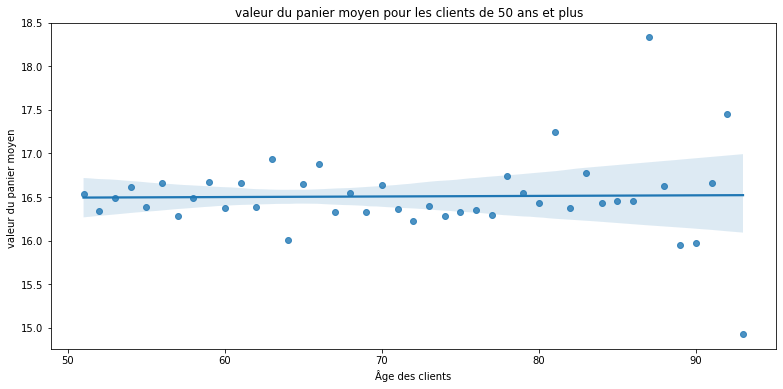

In [86]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='price', data =more_50)
plt.ylabel('valeur du panier moyen ')
plt.xlabel('Âge des clients')
plt.title("valeur du panier moyen pour les clients de 50 ans et plus  ")

### 3.3.8.2 Conclusion 
les résultats du test spearmanr confirme l'hypotése qu'il n y pas de lien entre l'age du client et la valeur de son panier moyen avec un coeficient de -0.006

## 3.4 le lien entre l’âge des clients et la fréquence d’achat 
l'age est une variable quantitative Vs la fréquence d'achat aussi est une variable quantitative<br>
Pour les variables quantitative on doit commencer par un test de normalité pour choisire entre un test statistique paramétrique ou non paramtrique <br>
On a déjà trouvé que l'age ne suit pas une distribution normal donc on vérifie la normalité des fréquences d'achat


In [87]:
frequence= df.groupby(["client_id", "age"],as_index=False).agg( fq =('session_id', "count"))

In [88]:
frequence

,client_id,age,fq
0,c_1,67,38
1,c_10,66,58
2,c_100,30,8
3,c_1000,56,124
4,c_1001,40,99
...,...,...,...
8590,c_995,67,14
8591,c_996,52,94
8592,c_997,28,58
8593,c_998,21,53


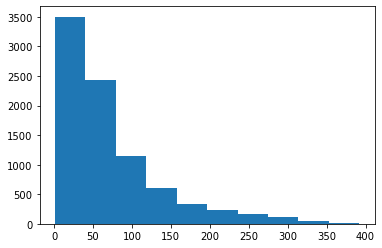

In [89]:
plt.hist(x=frequence['fq']);

### 3.4.1 Les tests de normalité 


**test de normalité d'anderson sur la frequence d'achat**

In [90]:
frequence=frequence.groupby("age",as_index=False).mean()

In [91]:
frequence

,age,fq
0,18,34.013730
1,19,29.434483
2,20,30.944828
3,21,33.416000
4,22,31.823529
...,...,...
71,89,40.125000
72,90,49.666667
73,91,41.500000
74,92,56.250000


In [92]:
#H0:les données du fréquence d'achat suivent une distribution normal  
#H1:les données du fréquence d'achat ne suivent pas une distribution normal  
s,p,g=stats.anderson(frequence["fq"], dist='norm')
print(" pour une alpha= 0.05 ")
if p[2]>0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


**test de normalité de jerque_bera sur la frequence d'achat**

In [93]:
#H0:les données du montant total suivent une distribution normal  
#H1:les données du montant total ne suivent pas une distribution normal 
s,p=stats.jarque_bera(frequence['fq'])
print(" pour une alpha= 0.05 ")
if p<0.05:
    print("H0 rejeter , les données ne suivent pas une distribution normal ")
else:
    print("HO conserver , les donner suivent une distribution normal ")

 pour une alpha= 0.05 
H0 rejeter , les données ne suivent pas une distribution normal 


### 3.4.2 Choix du test statistique 
les deux valeurs ne suivent pas une distribution normal donc nous allons utiliser un test de correlation non paramétrique (spearmanr)

### 3.4.3 hypothéses du test statistique spearmanr

h0= pas de lien l'age et la fréquence d'achat<br>
h1= il y'a un lien entre l'age et la fréquence d'achat


### 3.4.4 Execution du test statistique spearmanr

In [94]:
c,p=stats.spearmanr(frequence[["age","fq"]])
p

0.9809250213134854

In [95]:

if p <=alpha:
    print("Rejeter H0,il y'a un lien entre l'age' et la fréquence d'achat")
else:
    print("conserver H0,pas de lien entre l'age et la fréquence d'achat")
if c>0:
    print("une correlation positive de ",round(c,5))
else :
    print( "une correlation négative de ",round(c,5))

conserver H0,pas de lien entre l'age et la fréquence d'achat
une correlation positive de  0.00279


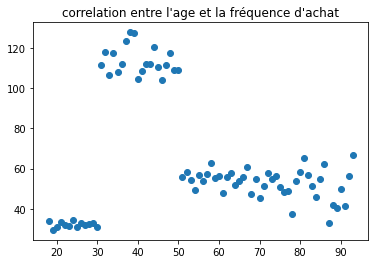

In [96]:
plt.scatter(frequence["age"],frequence['fq'])
plt.title("correlation entre l'age et la fréquence d'achat" );

### 3.4.5 Conclusion 
Selon le test statistique spearmanr on peut conclure qu'il n'y a pas de relation entre l'age du client et la valeur de la fréquence de ses achats  , nous allons approfendire notre etude de correlation sur chaque tranche d'age en se basant sur les resultats du graphes(moins de 30ans , entre 30 et 50 ans , 50 ans et plus )

### 3.4.6.1 Le coeficient de corrélation entre l’age et la moyenne de la frequence d'achat pour les clients de moins de 30 ans avec le test de spearmanr

In [97]:
frequence_less_30=frequence[frequence["age"]<30]

In [98]:
frequence_less_30.head()

,age,fq
0,18,34.013730
1,19,29.434483
2,20,30.944828
3,21,33.416000
4,22,31.823529


In [99]:
#h0= pas de lien entre l'age et la frequence d'achat moyenne  
#h1= il y'a un lien entre l'age et la frequence d'achat moyenne
c,p=stats.spearmanr(frequence_less_30[["age","fq"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la frequence d'achat")
else:
    print("conserver H0,pas de lien entre l'age et la frequence d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  0.1258741258741259
le p value est  0.6966831093957659
conserver H0,pas de lien entre l'age et la frequence d'achat
une correlation positive de  0.126


**Visualisation de la correlation entre l'age du client et la moyenne des fréquences d'achat** 

Text(0.5, 1.0, "la moyenne des frequences d'achat pour les clients demoins de 30 ans")

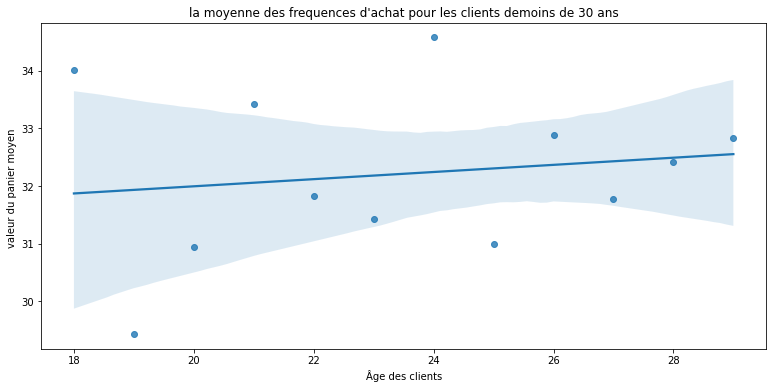

In [100]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='fq', data =frequence_less_30)
plt.ylabel('valeur du panier moyen ')
plt.xlabel('Âge des clients')
plt.title("la moyenne des frequences d'achat pour les clients demoins de 30 ans")

### 3.4.6.2 Conclusion 
les résultats du test spearmanr sur les client de moins de 30ans confirme l'hypotése qu'il n y pas de lien entre l'age du client et la fréquence de ses achats avec un coeficient de 0.09

### 3.4.7.1 Le coeficient de corrélation entre l’age et la moyenne de la frequence d'achat pour les clients de 30 à 50 ans avec le test de spearmanr

In [101]:
frequence_less_50=frequence[(frequence["age"]>30)&(frequence["age"]<50)]

In [102]:
#h0= pas de lien entre l'age et la frequence d'achat moyenne  
#h1= il y'a un lien entre l'age et la frequence d'achat moyenne
c,p=stats.spearmanr(frequence_less_50[["age","fq"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la frequence d'achat")
else:
    print("conserver H0,pas de lien entre l'age et la frequence d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.10701754385964912
le p value est  0.662788885833302
conserver H0,pas de lien entre l'age et la frequence d'achat
une correlation négative de  -0.107


**Visualisation de la correlation entre l'age du client et la moyenne des fréquences d'achat** 

Text(0.5, 1.0, "la moyenne des frequences d'achat pour les clients de 30 à 50 ans")

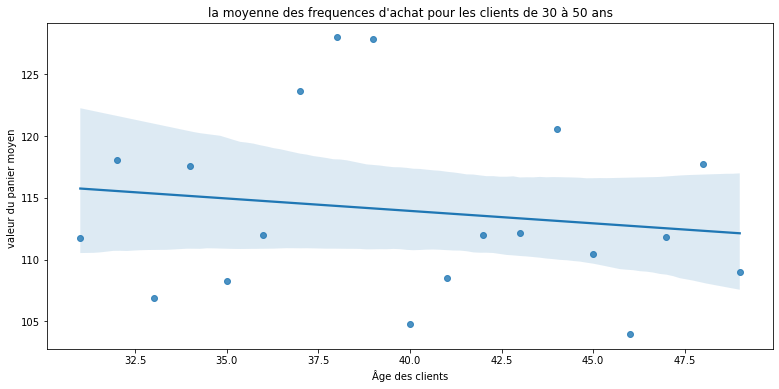

In [103]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='fq', data =frequence_less_50)
plt.ylabel('valeur du panier moyen ')
plt.xlabel('Âge des clients')
plt.title("la moyenne des frequences d'achat pour les clients de 30 à 50 ans")

### 3.4.7.2 Conclusion 
les résultats du test spearmanr sur les client entre 30 et 50ans confirme l'hypotése qu'il n y pas de lien entre l'age du client et la fréquence de ses achats avec un coeficient de -0.14

### 3.4.8.1 Le coeficient de corrélation entre l’age et la moyenne de la frequence d'achat pour les clients de 50 ans et plus  avec le test de spearmanr

In [104]:
frequence_more_50=frequence[frequence["age"]>=50]

In [105]:
#h0= pas de lien entre l'age et la frequence d'achat moyenne  
#h1= il y'a un lien entre l'age et la frequence d'achat moyenne
c,p=stats.spearmanr(frequence_more_50[["age","fq"]])
print( "le coef de correlation est ",c)
print("le p value est ",p)
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre l'age et la frequence d'achat")
else:
    print("conserver H0,pas de lien entre l'age et la frequence d'achat")
if c>0:
    print("une correlation positive de ",round(c,3))
else :
    print( "une correlation négative de ",round(c,3))

le coef de correlation est  -0.28442565186751234
le p value est  0.061316516160557895
conserver H0,pas de lien entre l'age et la frequence d'achat
une correlation négative de  -0.284


**Visualisation de la correlation entre l'age du client et la moyenne des fréquences d'achat** 

Text(0.5, 1.0, "la moyenne des frequences d'achat pour les clients de 50 ans et plus")

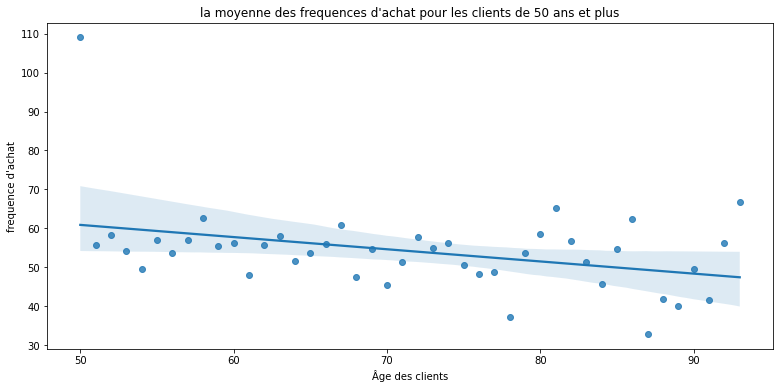

In [106]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='fq', data =frequence_more_50)
plt.ylabel("frequence d'achat")
plt.xlabel('Âge des clients')
plt.title("la moyenne des frequences d'achat pour les clients de 50 ans et plus")

### 3.4.8.2 Conclusion 
les résultats du test spearmanr sur les client de 50ans ou plus rejete l'hypotése nulle et accepte l'hypotése altérnative qu'il y a une relation entre l'age du client et sa fréquence d'achat avec un coef de corrélation de -0.3
Alors pour les clients agées de 50 ans ou plus, plus ils sont agées plus leurs fréquence d'achat est basse

##  3.5 le lien entre l’âge des clients et les catégories des livres achetés
### 3.5.1 Choix du test statistique 

- Le test utilisé pour tester la liaison entre une variable quantitative et une variable qualitative à deux modalités est le 

test de Student, Pour une variable qualitative avec plus de deux modalités, on fait un test ANOVA (Analysis Of Variance) 

analyse de la variance, dans notre cas notre variable qualitative catégorie compte plus de deux modalités (0, 1 et 2), on opte 

alors pour un test ANOVA, ce dernier nécessite certaines conditions sur la distribution de probabilité des données (On parle de 

test paramétrique).

#### Test d’ANOVA

##### Conditions d’application :

- Les échantillons sont issus d’une population normale.
- Les variances conditionnelles (variances dans chaque sous-population) sont identiques.

In [107]:
categ_0=df[df['categ'] == "0"]['age']
categ_1=df[df['categ'] == "1"]['age']
categ_2=df[df['categ'] == "2"]['age']

**Test de Bartlett vérification de l’homogénéité de chaque groupe de la variable 'categ'**

- Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
- H0: les variances de chaque groupe de catégorie sont égaux
- H1: les variances de chaque groupe de catégorie ne sont pas égaux

In [108]:
stat, p = stats.bartlett(categ_0, categ_1, categ_2)
print( 'p_value:',p)
if p<=alpha:
    print("Rejeter H0,les variances de chaque groupe de catégorie ne sont pas égaux")
else:
    print("conserver H0,les variances de chaque groupe de catégorie sont égaux")

p_value: 0.0
Rejeter H0,les variances de chaque groupe de catégorie ne sont pas égaux


**les valeurs d'age ne suivent pas une distribution normale et les variances d'age dans chaque categorie ne sont pas égaux  <br>Les conditions d'utilisations de tests d'ANOVA ne sont pas respectées, on réalise alors le test alternatif KRUSKALL - WILLIS**

### 3.5.2 Les hypotéses du Test de KRUSKALL - WILLIS

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:<br>
H0: les médians de chaque groupe de catégorie sont égaux<br>
H1: les médians de chaque groupe de catégorie ne sont pas égaux

### 3.5.3 Execution du Test de KRUSKALL - WILLIS

In [109]:
s,p=stats.kruskal(categ_0, categ_1, categ_2)
print( 'p_value:',p)
if p<=alpha:
    print("Rejeter H0,les médians de chaque groupe de catégorie ne sont pas égaux")
else:
    print("conserver H0,les médians de chaque groupe de catégorie sont égaux")

p_value: 0.0
Rejeter H0,les médians de chaque groupe de catégorie ne sont pas égaux


### 3.5.4 Conclusion 
Selon le test statistiques kruskall-wallis on peut rjeter l'hypothése nulle que les medians d'age sont égaux entre les trois catégories de livre achtée, donc on peut conclure  que l'age du client a un impacte sur la catégorie des livre acheté

## 3.6 Lien entre la categorie d'age et la categorie des livres acheter

### 3.6.1 Choix du test 
On cherche à determiner le lien entre (le genre du client qui est une variable qualitative **Vs** la catégorie des livres qui est une variable qualitative) qui se traduit par une dépendance ou indépendance  <br> On choisis **le test CHI-2** qui nous permet de verifier la l'indépendance de ces deux variables <br> 
### 3.6.2 L'hypothése de signification du test CH-2 
**h0= pas de lien entre la catégorie d'age et la catégorie de produits acheté**<br>
**h1= il y'a un lien entre la catégorie d'age et la catégorie de produits acheté**<br>
### 3.6.3 Création de la table de contingence

age_cat  (17.925, 36.75]  (36.75, 55.5]  (55.5, 74.25]  (74.25, 93.0]   somme
categ                                                                        
0                 103735         218541          42225           8052  372553
1                  55532          89787          56367          10662  212348
2                  29530           1368            858            203   31959
somme             188797         309696          99450          18917  616860


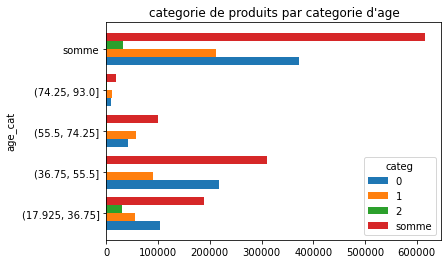

In [110]:
contingency_table=pd.crosstab(df['categ'],df["age_cat"],margins=True, margins_name="somme")
print(contingency_table)
contingency_table.T.plot(kind='barh', ylabel='frequence', width=0.8)
plt.title("categorie de produits par categorie d'age");

### 3.6.4 Execution du test CH-2

In [111]:
# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_table) 
# Print the p-value
print(f"le P_value={p}")
alpha=0.05
if p<=alpha:
    print("Rejeter H0,il y'a un lien entre la categorie d'age et la catégorie des produits acheté")
else:
    print("conserver H0,pas de lien entre la categorie d'age et la catégorie des produits acheté")
    Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[:,0])
no_of_columns=len(contingency_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",ddof)

le P_value=0.0
Rejeter H0,il y'a un lien entre la categorie d'age et la catégorie des produits acheté
Observed Values :-
 [[193309 111331  16537 321177]
 [179244 101017  15422 295683]
 [372553 212348  31959 616860]]
Expected Values :-
 [[114024.07149272 187041.10152709  60062.89247155  11424.93450864
  372553.        ]
 [ 64991.51404857 106609.80807314  34234.68631456   6511.99156373
  212348.        ]
 [  9781.41445871  16045.09039977   5152.42121389    980.07392763
   31959.        ]
 [188797.         309696.          99450.          18917.
  616860.        ]]
Degree of Freedom:  12


### 3.6.5 Conclusion 

In [112]:
contingency_table=pd.crosstab(df['categ'],df["age_cat"],margins=True, margins_name="sommes" ,normalize=True)
contingency_table

age_cat,"(17.925, 36.75]","(36.75, 55.5]","(55.5, 74.25]","(74.25, 93.0]",sommes
categ,,,,,
0,0.168166,0.354280,0.068452,0.013053,0.603951
1,0.090024,0.145555,0.091377,0.017284,0.344240
2,0.047871,0.002218,0.001391,0.000329,0.051809
sommes,0.306061,0.502052,0.161220,0.030667,1.000000


Text(0.5, 1.0, "correlation entre la tranche d'age et la catégorie des livres acheté ")

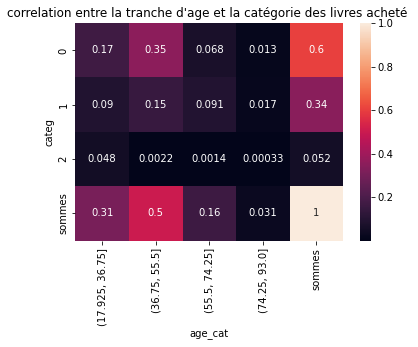

In [113]:
ax=sns.heatmap(data=contingency_table,annot=True)
plt.title("correlation entre la tranche d'age et la catégorie des livres acheté ")

Selon le test chi_2 on peut conclure que les deux variable catégorie d'age du client et la catégorie des livres achetés sont dépendants<br> Avec la heatmap on peux voir que:<br>
les personnes de moins de 37ans achetents 11% de plus dans la catégorie 0  que la catégorie 1 et 4% de plus dans la catégorie 1 que la catégorie 2, pour une attribution de 31% du totals d'achats<br>
les personnes entre 37 et 55ans achentent 22% de plus dans la catégorie 0  que la catégorie 1 et 14% de plus dans la catégorie 1 que la catégorie 2 , pour une attribution de 50% du totals d'achats<br>
les personnes entre 55 et 74ans achetents 2% de **moins** dans la catégorie 0  que la catégorie 1 et 8% de plus dans la catégorie 1 que la catégorie 2, pour une attribution de 16% du totals d'achats<br> 
les personnes de plus de 74ans achetents 0.4% de **moins** dans la catégorie 0  que la catégorie 1 et 1.7% de plus dans la catégorie 1 que la catégorie 2 , pour une attribution de 3% du totals d'achats<br>
